# Perceptron from Scratch

The Perceptron algorithm is the simplest type of artificial neural network.

It is a model of a single neuron that can be used for two-class classification problems and provides the foundation for later developing much larger networks.

<img src="perceptron.png">

* Inputs consists of all the input features ($x_1,\space x_2,\space x_3,...$) and a bias (a minimum value)  
    

* Weights ($w_1,\space w_2,\space w_3,...$) are the parameters that we need to optimize. The weights of the Perceptron algorithm must be estimated from your training data using stochastic gradient descent.
  
    
* Weighted Sum: $\sum\limits_{i=1}^{n}(w_ix_i) + bias$  
      
      
* Activation Function which is a unit step function which will produce the final output, the prediction.  

## Stochastic Gradient Descent
Gradient Descent is the process of minimizing a function by following the gradients of the cost function. The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. Weights are updated according to the following formula:  

$w_i = w_i + \gamma \times (y - \hat y) \times x_i$ where:
* w is the weight
* $\gamma$ is the learning rate
* y is the actual output
* $\hat y$ is the predicted output
* x is the input respective to that weight

## Creating Fake Data

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=99)

In [3]:
import seaborn as sns

In [4]:
sns.set_style("darkgrid")
sns.set_palette("prism")

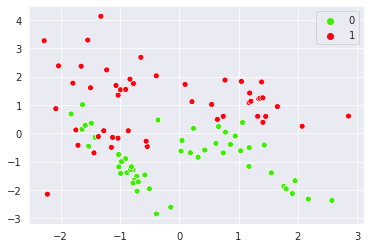

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

## Make Prediction using Perceptron

In [8]:
def predict_one(x, weights):
    activation = weights[0]
    for i in range(len(x)):
        activation += x[i]*weights[i+1]
    if activation >= 0:
        return 1
    else:
        return 0

## Learning Weights

In [9]:
def fit(X, y, l_rate, n_epoch):
    # weight 0 represents bias
    n_features = len(X[0])
    weights = [0.0 for _ in range(n_features+1)]
    errors=[]
    for epoch in range(n_epoch):
        # Sum Squared error
        sum_error = 0
        for i in range(len(X)):
            prediction = predict_one(X[i], weights)
            error = y[i] - prediction
            sum_error += error*error
            weights[0] += l_rate*error
            for j in range(n_features):
                weights[j+1] += l_rate*error*X[i,j]
        errors.append(sum_error)
        print("Epoch %2d => Error %.3f"%(epoch+1, sum_error))
    return (weights, errors)

In [10]:
l_rate = 0.01
n_epoch = 30
weights, errors = fit(X_train, y_train, l_rate, n_epoch)

Epoch  1 => Error 26.000
Epoch  2 => Error 24.000
Epoch  3 => Error 22.000
Epoch  4 => Error 18.000
Epoch  5 => Error 22.000
Epoch  6 => Error 22.000
Epoch  7 => Error 22.000
Epoch  8 => Error 25.000
Epoch  9 => Error 22.000
Epoch 10 => Error 25.000
Epoch 11 => Error 22.000
Epoch 12 => Error 22.000
Epoch 13 => Error 22.000
Epoch 14 => Error 22.000
Epoch 15 => Error 22.000
Epoch 16 => Error 23.000
Epoch 17 => Error 22.000
Epoch 18 => Error 23.000
Epoch 19 => Error 21.000
Epoch 20 => Error 23.000
Epoch 21 => Error 21.000
Epoch 22 => Error 23.000
Epoch 23 => Error 22.000
Epoch 24 => Error 23.000
Epoch 25 => Error 22.000
Epoch 26 => Error 23.000
Epoch 27 => Error 18.000
Epoch 28 => Error 24.000
Epoch 29 => Error 22.000
Epoch 30 => Error 21.000


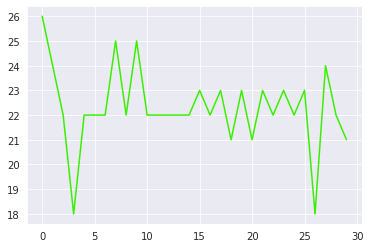

In [11]:
sns.lineplot(x=range(n_epoch), y=errors)

## Performance Measurement

In [12]:
predictions = [predict_one(x, weights) for x in X_test]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 9  2]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30



## An unexpectedly well performance by just a single perceptron!